In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
#seed 값을 설정하겠다.
seed=0
numpy.random.seed(seed)
tf.random.set_seed(3)

#MNIST 데이터를 불러오겠다.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)

In [3]:
#딥러닝을 실행하기 위해 프레임을 설정하겠다. 784개의 속성이 있고 10개의 클래스가 있다.
model = Sequential()
model.add(Dense(512,input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [4]:
#딥러닝 실행 환경을 설정하겠다.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [5]:
#모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단할 수 있게 설정하겠다.
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
#샘플 200개를 30번 실행하도록 설정하겠다. 
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

#테스트셋으로 최종 모델의 성과를 측정하여 값을 출력하겠다.
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15406, saving model to ./model/01-0.1541.hdf5

Epoch 00002: val_loss improved from 0.15406 to 0.10387, saving model to ./model/02-0.1039.hdf5

Epoch 00003: val_loss improved from 0.10387 to 0.08456, saving model to ./model/03-0.0846.hdf5

Epoch 00004: val_loss improved from 0.08456 to 0.07741, saving model to ./model/04-0.0774.hdf5

Epoch 00005: val_loss improved from 0.07741 to 0.06865, saving model to ./model/05-0.0687.hdf5

Epoch 00006: val_loss improved from 0.06865 to 0.06098, saving model to ./model/06-0.0610.hdf5

Epoch 00007: val_loss did not improve from 0.06098

Epoch 00008: val_loss improved from 0.06098 to 0.06008, saving model to ./model/08-0.0601.hdf5

Epoch 00009: val_loss improved from 0.06008 to 0.05801, saving model to ./model/09-0.0580.hdf5

Epoch 00010: val_loss did not improve from 0.05801

Epoch 00011: val_loss did not improve from 0.05801

Epoch 00012: val_loss did not improve from 0.05801

Epoch 00013: val_loss did n

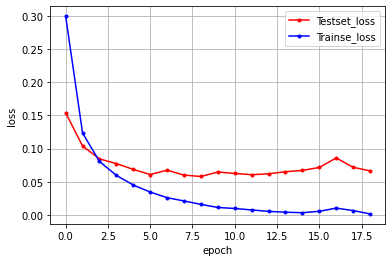

In [7]:
#테스트셋의 오차
y_vloss = history.history['val_loss']

#학습셋의 오차
y_loss = history.history['loss']

#실행 결과를 그래프로 표현하겠다.
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainse_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0,20,0,0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()